<a href="https://colab.research.google.com/github/Memo28/100DayofML/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

In [14]:
data_path ='data/'
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validation_set = datasets.CIFAR10(data_path, train = False, download= True)

Files already downloaded and verified
Files already downloaded and verified


In [20]:
classes = ['plane','car', 'bird', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
len(dataset)
img, label = dataset[522]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF2C5F31160>, 2, 'bird')

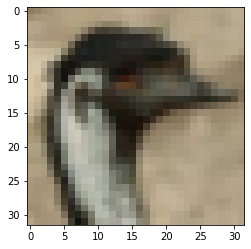

In [21]:
plt.imshow(img)

In [22]:
tensor_transform = transforms.ToTensor()
img_tensor = tensor_transform(img)
img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FF2C5F31160>,
 tensor([[[0.5529, 0.5804, 0.6235,  ..., 0.7098, 0.7333, 0.7294],
          [0.6235, 0.6549, 0.6627,  ..., 0.6980, 0.7255, 0.7333],
          [0.7098, 0.7098, 0.6863,  ..., 0.6902, 0.7176, 0.7255],
          ...,
          [0.6275, 0.6235, 0.6510,  ..., 0.6863, 0.7059, 0.6941],
          [0.6549, 0.6275, 0.6392,  ..., 0.7137, 0.7216, 0.6902],
          [0.7059, 0.6510, 0.6431,  ..., 0.7098, 0.7294, 0.7020]],
 
         [[0.4863, 0.5137, 0.5569,  ..., 0.6549, 0.6784, 0.6745],
          [0.5569, 0.5882, 0.5961,  ..., 0.6431, 0.6706, 0.6784],
          [0.6392, 0.6431, 0.6196,  ..., 0.6353, 0.6627, 0.6706],
          ...,
          [0.5569, 0.5569, 0.5843,  ..., 0.6235, 0.6431, 0.6353],
          [0.5882, 0.5608, 0.5725,  ..., 0.6510, 0.6588, 0.6314],
          [0.6392, 0.5843, 0.5765,  ..., 0.6471, 0.6667, 0.6392]],
 
         [[0.3765, 0.4039, 0.4471,  ..., 0.5451, 0.5725, 0.5647],
          [0.4471, 0.4784, 0.4863,  ..., 0

In [24]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [27]:
img, label = dataset[50]
img

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

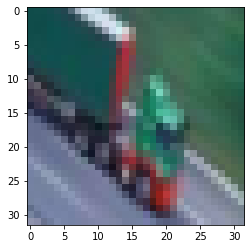

In [29]:
img.min(), img.max()
plt.imshow(img.permute(1, 2, 0))

In [0]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [31]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [33]:
imgs.view(3, -1).mean(dim=1), imgs.view(3, -1).std(dim=1)

(tensor([0.4915, 0.4823, 0.4468]), tensor([0.2470, 0.2435, 0.2616]))

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
     ])

In [35]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

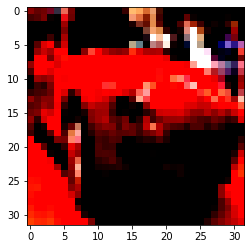

In [37]:
img_transoformed, label = dataset[5]

plt.imshow(img_transoformed.permute(1, 2, 0))
classes[label]